In [31]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from numpy import argmax
from matplotlib import pyplot
from pandas import DataFrame

### Generate Sample Data

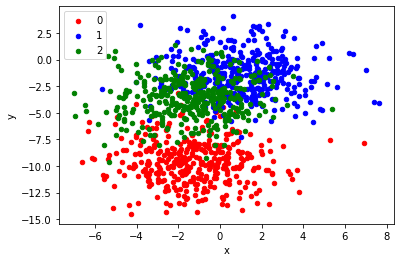

(100, 2) (1000, 2)


In [32]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

### Single Model Layer 
- Random Forest Algorithm
- Adaboost Algorithm
- Gradient Boosting Decision Trees Algorithm (GBDT)
- XGBoost Algorithm

In [50]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import joblib as joblib

In [52]:
def save_model(model, name):
    joblib.dump(clf, 'models/{}.pkl'.format(name)) 

In [53]:
def calc_mse(label, logits):
    mse = mean_squared_error(label, logits)
    print("MSE: {}".format(mse))

##### Random Forest Algorithm

In [54]:
rf = RandomForestClassifier(max_depth=30, random_state=0, max_features="sqrt", min_samples_leaf=10)
rf.fit(trainX, trainy)
predy_rf = rf.predict(testX)

calc_mse(testy, predy_rf)
save_model(rf, "Random_Forest")

MSE: 0.343


##### Adaboost Algorithm

In [55]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.05)
ada.fit(trainX, trainy)

predy_ada = ada.predict(testX)

calc_mse(testy, predy_ada)
save_model(ada, "Adaboost")


MSE: 0.374


##### GBDT Algorithm

In [56]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_features="sqrt", min_samples_leaf=10)
gb.fit(trainX, trainy)

predy_gb = gb.predict(testX)

calc_mse(testy, predy_gb)
save_model(ada, "GBDT")

MSE: 0.361


##### XGBoost Algorithm

In [57]:
xgb = XGBClassifier()
xgb.fit(trainX, trainy)

predy_xgb = gb.predict(testX)

calc_mse(testy, predy_xgb)
save_model(ada, "XGBoost")

MSE: 0.361


In [69]:
from sklearn.ensemble import StackingClassifier

In [70]:
def fit_stacked_model(inputX, inputY):
    
    estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.05)),
    ('gb', GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_features="sqrt", min_samples_leaf=10)),
    ('xgb', XGBClassifier()),
    ]
    clf = StackingClassifier(
        estimators=estimators, final_estimator=XGBClassifier()
    )

    clf.fit(inputX, inputY)

    return clf

In [71]:
stacked_model = fit_stacked_model(trainX, trainy)
# make predictions and evaluate
predy_staking = stacked_model.predict(testX)

calc_mse(testy, predy_staking)

MSE: 0.377
